# Нейронная сеть, которая решает задачу регрессии

Задача: предсказать функцию sin(y)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [ ]:
import torch

## Train dataset



Text(0.5, 1.0, '$y = sin(x)$')

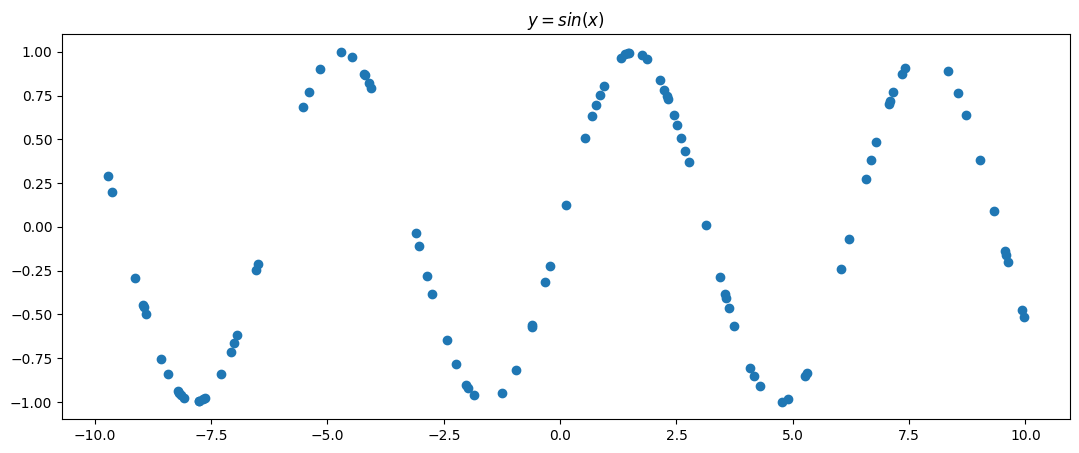

In [ ]:
# берём точки из равномерного распределения от 0 до 1 в размере 100 шт
x_train = torch.rand(100)
# приводим наши точки к данной формуле,что бы график был по середине
x_train = x_train * 20.0 - 10.0
# синусы от данных точек
y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$')

Text(0.5, 1.0, 'Gaussian noise')

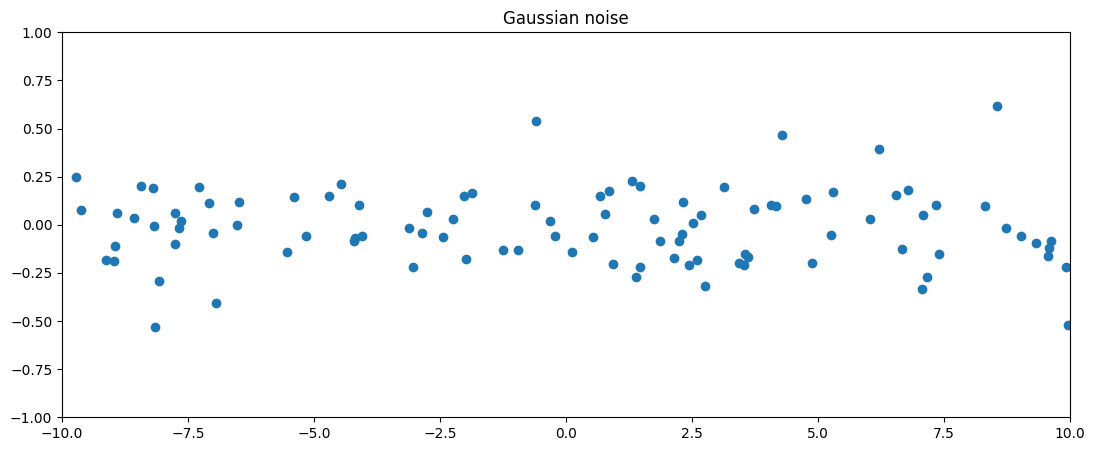

In [ ]:
# Шум из нормального распределения
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise')

Text(0, 0.5, 'y_train')

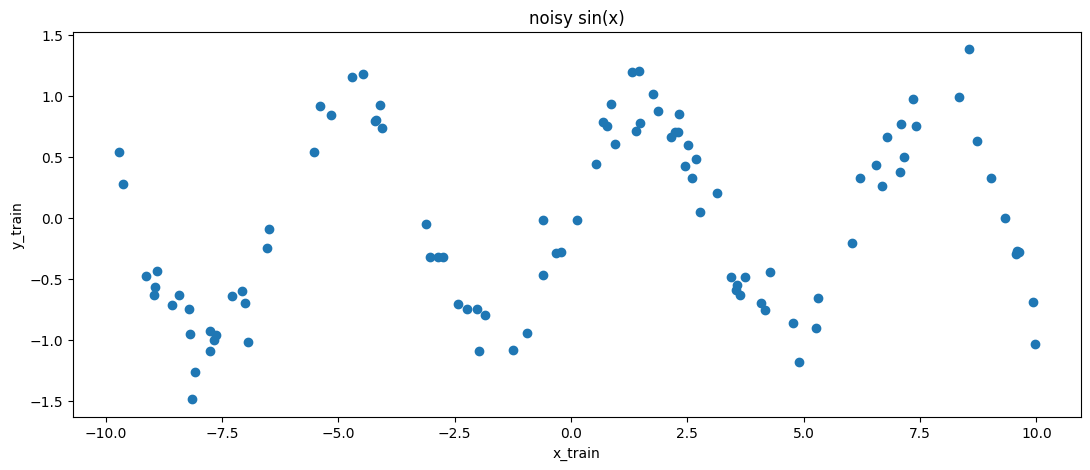

In [ ]:
# Шум прибавляем к каждой точке предыдущего графика
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
# Получаем зашумлённые данные, в них виден синус
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train')

In [ ]:
# unsqueeze - правильная размерность,из строки переводим в столбик
'''
 метод_ - метод трансформирует тот объект к которому он применяется,
 X_train и Y_train изменились, теперь это столбцы
'''
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[ 0.9862],
        [ 0.9736],
        [ 0.7131],
        [-0.2842],
        [ 0.8737],
        [-0.8653],
        [-0.0188],
        [ 0.5411],
        [-0.4379],
        [ 0.3249],
        [-1.0975],
        [ 1.0147],
        [-0.7510],
        [-0.9029],
        [ 0.7829],
        [-0.9594],
        [ 0.3256],
        [-0.7969],
        [ 0.3259],
        [-0.4433],
        [-0.0185],
        [-0.4756],
        [ 1.1984],
        [-0.3209],
        [-0.7473],
        [-0.7489],
        [ 0.5936],
        [-0.7121],
        [ 0.4833],
        [-0.6307],
        [ 0.7686],
        [ 0.4268],
        [ 0.2584],
        [-0.2778],
        [ 0.2056],
        [-1.0961],
        [-0.0061],
        [ 0.7316],
        [ 1.1492],
        [ 0.6649],
        [-0.7027],
        [-0.2916],
        [-1.2675],
        [ 0.0488],
        [-0.6040],
        [-0.2103],
        [-1.0836],
        [-0.4838],
        [-0.9330],
        [ 0.7009],
        [ 0.5002],
        [-0.0521],
        [-0.

In [ ]:
tmp = torch.Tensor([1, 2, 3])
print(tmp.unsqueeze(1))

tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

Text(0, 0.5, 'y_validation')

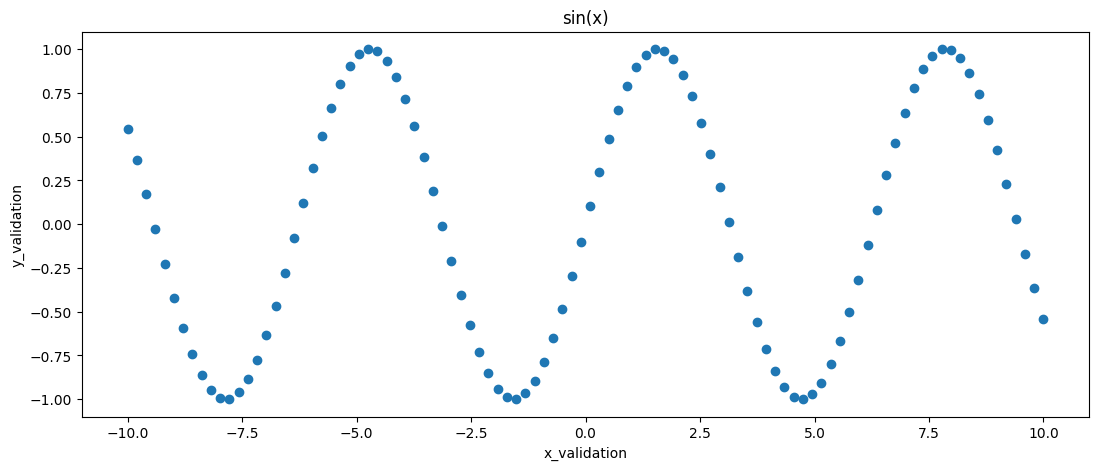

In [ ]:
# валидационные данные(проверочные данные)
x_validation = torch.linspace(-10, 10, 100)
'''
Мы знаем, что наши данные - это значения функции синуса, поэтому
мы в валидационный датасет возьмём просто функцию синуса и не будем добавлять
шум. Это не очень правильно, так как у нас почти всегда данные зашумлены
'''
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[ 0.5440],
        [ 0.3646],
        [ 0.1703],
        [-0.0308],
        [-0.2308],
        [-0.4213],
        [-0.5947],
        [-0.7439],
        [-0.8629],
        [-0.9467],
        [-0.9921],
        [-0.9971],
        [-0.9615],
        [-0.8869],
        [-0.7761],
        [-0.6338],
        [-0.4658],
        [-0.2787],
        [-0.0804],
        [ 0.1213],
        [ 0.3180],
        [ 0.5017],
        [ 0.6651],
        [ 0.8014],
        [ 0.9051],
        [ 0.9720],
        [ 0.9994],
        [ 0.9861],
        [ 0.9327],
        [ 0.8414],
        [ 0.7158],
        [ 0.5612],
        [ 0.3837],
        [ 0.1906],
        [-0.0103],
        [-0.2107],
        [-0.4026],
        [-0.5781],
        [-0.7300],
        [-0.8523],
        [-0.9399],
        [-0.9893],
        [-0.9985],
        [-0.9670],
        [-0.8962],
        [-0.7889],
        [-0.6496],
        [-0.4839],
        [-0.2984],
        [-0.1008],
        [ 0.1008],
        [ 0.2984],
        [ 0.

# Model constraction

In [ ]:
'''
Создаём класс SineNet,которая восстанавливает нашу функцию синуса
наследуем от класса torch.nn.Module

Инициализируем те слои, которые используются в сети

__init__ принимает всё что угодно, мы передаём количество скрытых нейронов,
т е n_hidden_neurons, которые будут хранится в каждом слое

super(SineNet, self).__init__() - инициализация родительского объекта

слой fc1 - fully connected layer, полносвязанный слой, в PyTorch - это Linear,
передаём количество входных (1 число X, координата нашей точки)
и выходных нейронов

self.act1 = torch.nn.Sigmoid() - функция активации

self.fc2 = torch.nn.Linear(n_hidden_neurons, 1) - ещё один слой, но с одним
выходом, наш ответ


forward(self, x): - то, как наши слои последовательно применяются
'''

class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

# 50 - количество нейронов, объект sine_net, который можно обучать
sine_net = SineNet(50)

# Prediction

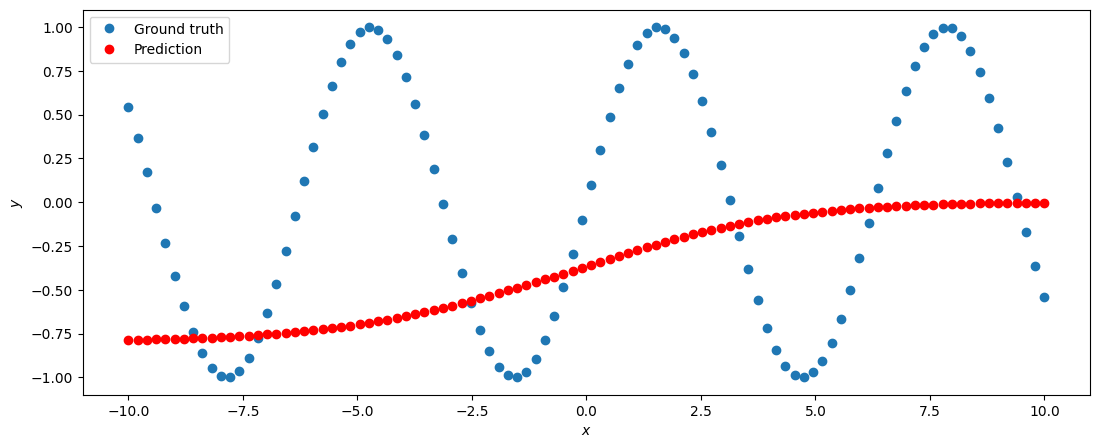

In [ ]:
# Напишем функции предсказания

def predict(net, x, y):
  # вызывем метод предсказания и получим некоторый результат
  y_pred = net.forward(x)

  plt.plot(x.numpy(), y.numpy(), 'o', label='Ground truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction')
  plt.legend(loc='upper left')
  plt.xlabel('$x$')
  plt.ylabel('$y$')

# 2 графика, Gt - то что мы хотели получить, Pred - то что нам предсказала сеть
predict(sine_net, x_validation, y_validation)

# Optimizer

In [ ]:
# оптимизатор, который совершает шаги градиентного спуска
# torch.optim.Adam - способ совершения градиентного спуска,
# SGD здесь плохо работает
# передаём веса нейронной сети для обучения
# (не X, ибо на них мы не можем повлиять), lr - шаг град спуска
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01 )

# Loss function

In [ ]:
# Функция loss использует MSE
def loss(pred, target):
  # предсказание - реальное значение точки
  squares = (pred - target) ** 2
  return squares.mean()

# Training procedure

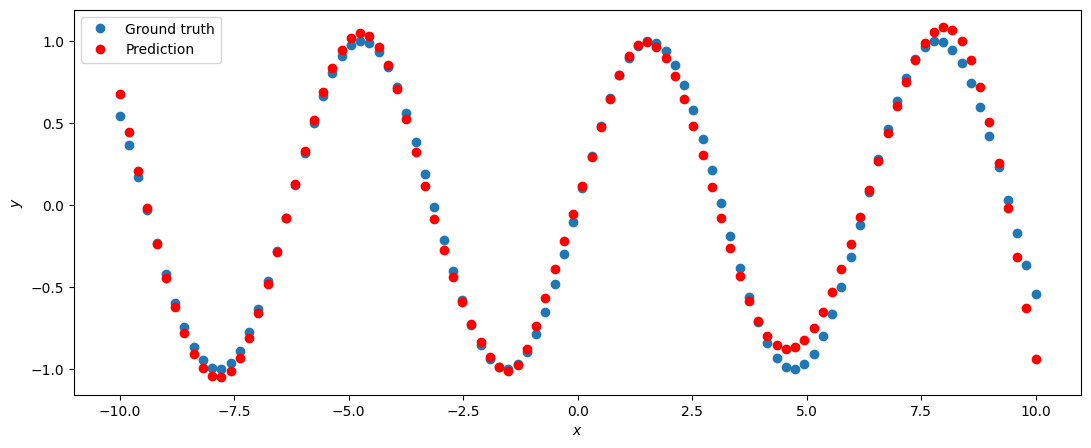

In [ ]:
'''
эпоха:
берём датасет, прогоняем через нейросеть
получим предсказание, посчитаем функцию потерь
посчитаем производную у loss func и сделаем градиентный шаг
'''
for epoch_index in range(2000):
  # зануляем градиент
  optimizer.zero_grad()
  # считаем предсказание через forward
  y_pred = sine_net.forward(x_train)
  # считаем функцию потерь, получаем скаляр
  loss_val = loss(y_pred, y_train)
  # делаем backward
  loss_val.backward()
  # делаем шаг
  optimizer.step()

predict(sine_net, x_validation, y_validation)